In [3]:
# !pip install torch

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### 1
Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:

Lr = 0.2

Lr = 2


In [135]:
def y(x):
    return torch.square(x)


In [127]:

def gradient_descent(x, learning_rate):
# Tensors containing current coordinates at the starting point we chose:
    x_start = torch.tensor(x, requires_grad=True)

    # start point:
    x_current = x_start
    y_current = y(x_current)

    x_coords = [x_current.item()]
    y_coords = [y_current.item()]

    for i in range(10):

        # Slope at current point
        y_current.backward()  # populate x_current.grad
        slope_current = x_current.grad

        x_current = torch.tensor(x_current.item() - (slope_current.item()) * learning_rate,
                            requires_grad=True)

        # Plug in x_new into y = x ** 2 to get y_new of second point
        y_current = y(x_current)

        # Store second point coordinates in our lists
        x_coords.append(x_current.item())
        y_coords.append(y_current.item())
    return x_coords, y_coords

def plot_grad_descent(lr, x_max, y_min, y_max):
    x = torch.linspace(-150000, 150000, 1000000)
    plt.plot(x, y(x), zorder=0)  # plot y = x ** 2

    x_coords, y_coords = gradient_descent(2., lr)
    plt.scatter(x_coords, y_coords)  # plot points showing steps
    # replot the last point in a new color
    plt.scatter(x_coords[-1], y_coords[-1], c="C1", zorder=1)


    plt.xlim(xmin=-x_max, xmax=x_max)
    plt.ylim(ymin=y_min, ymax=y_max)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.show()


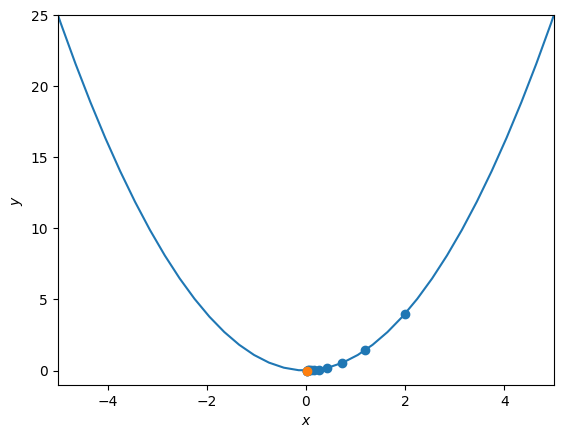

In [128]:
plot_grad_descent(lr=0.2, x_max=5, y_max=25, y_min=-1)

In [113]:
x_coords, y_coords = gradient_descent(2., learning_rate=2)
y_coords
x_coords

[2.0,
 -6.0,
 18.0,
 -54.0,
 162.0,
 -486.0,
 1458.0,
 -4374.0,
 13122.0,
 -39366.0,
 118098.0]

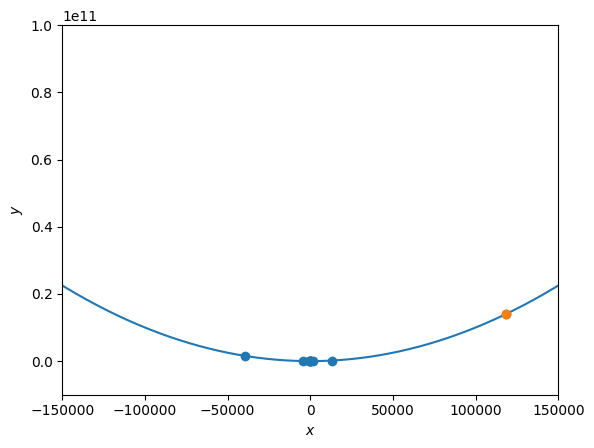

In [131]:
plot_grad_descent(lr=2, x_max=150000, y_max=1e11, y_min=-1e10)

### 2

In [133]:
# load data
data = pd.read_csv('/content/drive/MyDrive/23-24-01-last-semester/deep-learning-in-fault-detection/Data/data_linear.csv').values

# torch
x = torch.tensor(data[:,0])
y = torch.tensor(data[:,1])

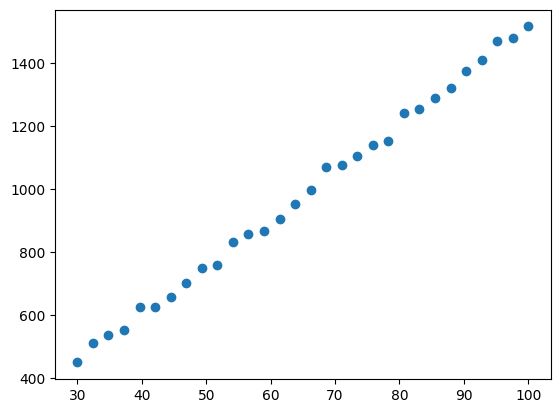

In [134]:
plt.scatter(x, y)

In [35]:
from torchmetrics.regression import MeanAbsolutePercentageError, MeanAbsoluteError

def model(x, a, b):
    return a * x + b

def loss_fn(y_hat, y):
    squared_diffs = (y_hat - y)**2
    return squared_diffs.mean()

def loss(y_hat, y):
    MSE = loss_fn(y_hat, y).item()
    RMSE = np.sqrt(MSE)
    mean_abs_percentage_error = MeanAbsolutePercentageError()
    mean_abs_error = MeanAbsoluteError()
    MAE = mean_abs_error(y_hat, y).item()
    MAPE = mean_abs_percentage_error(y_hat, y).item()
    return MSE, RMSE, MAE, MAPE

def gradient_descent(n_epochs, learning_rate, params, x, y):
    a, b = params

    losses = []
    for epoch in range(1, n_epochs + 1):
        # nếu có grad ở tham số a, b thì zero đi, tránh trường hợp cộng dồn grad
        if a.grad is not None:
            a.grad.zero_()
        if b.grad is not None:
            b.grad.zero_()

        # model, loss
        y_hat = model(x, a, b)
        loss = loss_fn(y_hat, y)

        # gọi backward để tính đạo hàm ngược của loss với tham số a, b
        loss.backward()

        # update a,b bằng thuật toán gradient descent, để torch.no_grad thì mình không cần backward ở bước này
        with torch.no_grad():
            a -= learning_rate * a.grad
            b -= learning_rate * b.grad

        if epoch % 1 == 0:
            losses.append(loss.item())
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return a, b, losses


Epoch 1, Loss 459832.411890
Epoch 2, Loss 31849971.119333
Epoch 3, Loss 2207259026.745877
Epoch 4, Loss 152968150169.640594
Epoch 5, Loss 10601047871021.642578
Epoch 6, Loss 734677202914234.125000
Epoch 7, Loss 50914823448706344.000000
Epoch 8, Loss 3528515080645266432.000000
Epoch 9, Loss 244534261875449102336.000000
Epoch 10, Loss 16946788857750916956160.000000
Epoch 11, Loss 1174451926501244478160896.000000
Epoch 12, Loss 81392238592397046104195072.000000
Epoch 13, Loss 5640670503530834191244591104.000000
Epoch 14, Loss 390911459930766411463586217984.000000
Epoch 15, Loss 27091069073532554465932916817920.000000
Epoch 16, Loss 1877473848428942385345739834261504.000000
Epoch 17, Loss 130113254492525438346694966451896320.000000
Epoch 18, Loss 9017149081772814359103743827839549440.000000
Epoch 19, Loss 624909255263556047365350948730017153024.000000
Epoch 20, Loss 43307658516574126747610532936000819167232.000000
tensor([2.5369e+19], requires_grad=True) tensor([3.5376e+17], requires_grad=

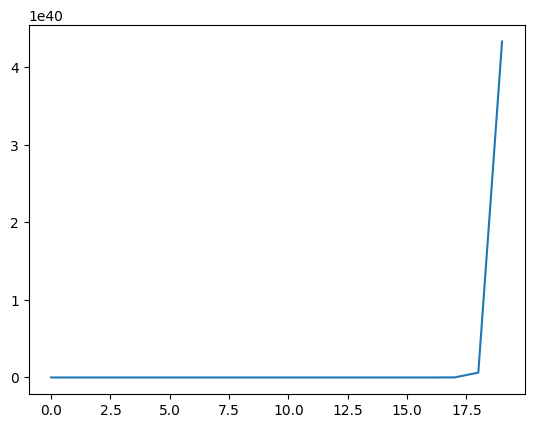

In [40]:
# overshoot
a = torch.tensor([25.], requires_grad=True)
b = torch.tensor([3.], requires_grad=True)
a, b, losses = gradient_descent(20, 0.001, (a, b), x, y)
plt.plot(losses)
print(a,b)

Epoch 1, Loss 459832.411890
Epoch 2, Loss 2351.032902
Epoch 3, Loss 265.396294
Epoch 4, Loss 255.887841
Epoch 5, Loss 255.844145
Epoch 6, Loss 255.843601
Epoch 7, Loss 255.843255
Epoch 8, Loss 255.842910
Epoch 9, Loss 255.842565
Epoch 10, Loss 255.842220
Epoch 11, Loss 255.841874
Epoch 12, Loss 255.841529
Epoch 13, Loss 255.841184
Epoch 14, Loss 255.840839
Epoch 15, Loss 255.840494
Epoch 16, Loss 255.840149
Epoch 17, Loss 255.839803
Epoch 18, Loss 255.839458
Epoch 19, Loss 255.839113
Epoch 20, Loss 255.838768


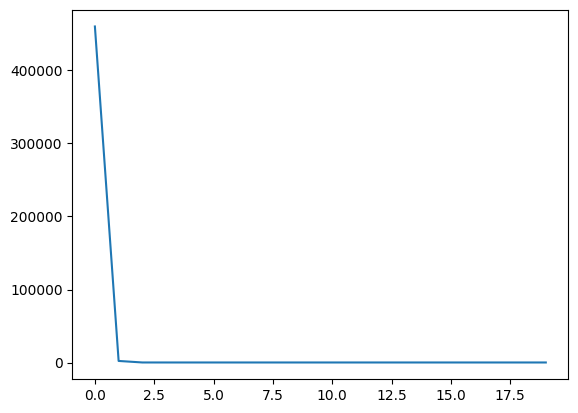

In [12]:
# suitable lr
a = torch.tensor([25.], requires_grad=True)
b = torch.tensor([3.], requires_grad=True)
a, b, losses = gradient_descent(20, 0.0001, (a, b), x, y)
plt.plot(losses)

Epoch 1, Loss 459832.411890
Epoch 2, Loss 378119.263393
Epoch 3, Loss 310934.852727
Epoch 4, Loss 255695.830259
Epoch 5, Loss 210278.368976
Epoch 6, Loss 172936.158145
Epoch 7, Loss 142233.432354
Epoch 8, Loss 116989.668980
Epoch 9, Loss 96234.325813
Epoch 10, Loss 79169.248779
Epoch 11, Loss 65138.367927
Epoch 12, Loss 53602.232170
Epoch 13, Loss 44117.198965
Epoch 14, Loss 36318.615399
Epoch 15, Loss 29906.619463
Epoch 16, Loss 24634.704462
Epoch 17, Loss 20300.129293
Epoch 18, Loss 16736.232278
Epoch 19, Loss 13806.016535
Epoch 20, Loss 11396.792840
Epoch 21, Loss 9415.932088
Epoch 22, Loss 7787.262413
Epoch 23, Loss 6448.165821
Epoch 24, Loss 5347.171168
Epoch 25, Loss 4441.929862
Epoch 26, Loss 3697.642660
Epoch 27, Loss 3085.687161
Epoch 28, Loss 2582.538242
Epoch 29, Loss 2168.852278
Epoch 30, Loss 1828.718780
Epoch 31, Loss 1549.062702
Epoch 32, Loss 1319.128995
Epoch 33, Loss 1130.076129
Epoch 34, Loss 974.638119
Epoch 35, Loss 846.834846
Epoch 36, Loss 741.756261
Epoch 37, Lo

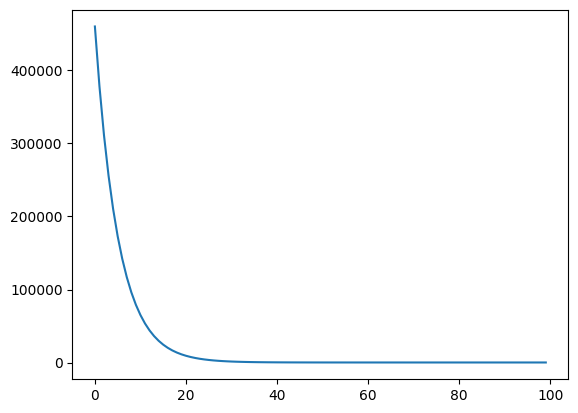

In [13]:
# small lr
a = torch.tensor([25.], requires_grad=True)
b = torch.tensor([3.], requires_grad=True)
a, b, losses = gradient_descent(100, 0.00001, (a, b), x, y)
plt.plot(losses)

In [14]:
# Chia train test

In [15]:
[x,y]

[tensor([ 30.0000,  32.4138,  34.8276,  37.2414,  39.6552,  42.0690,  44.4828,
          46.8966,  49.3103,  51.7241,  54.1379,  56.5517,  58.9655,  61.3793,
          63.7931,  66.2069,  68.6207,  71.0345,  73.4483,  75.8621,  78.2759,
          80.6897,  83.1034,  85.5172,  87.9310,  90.3448,  92.7586,  95.1724,
          97.5862, 100.0000], dtype=torch.float64),
 tensor([ 448.5240,  509.2480,  535.1040,  551.4320,  623.4180,  625.9920,
          655.2480,  701.3770,  748.9180,  757.8810,  831.0040,  855.4090,
          866.7070,  902.5450,  952.2610,  995.5310, 1069.7800, 1074.4200,
         1103.8800, 1138.6900, 1153.1300, 1240.2700, 1251.9000, 1287.9700,
         1320.4700, 1374.9200, 1410.1600, 1469.6900, 1478.5400, 1515.2800],
        dtype=torch.float64)]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_test, y_test

(tensor([95.1724, 66.2069, 85.5172, 71.0345, 49.3103, 51.7241],
        dtype=torch.float64),
 tensor([1469.6900,  995.5310, 1287.9700, 1074.4200,  748.9180,  757.8810],
        dtype=torch.float64))

Epoch 1, Loss 448855.343981
Epoch 2, Loss 4045.788662
Epoch 3, Loss 280.390537
Epoch 4, Loss 248.515461
Epoch 5, Loss 248.245531
Epoch 6, Loss 248.243153
Epoch 7, Loss 248.243041
Epoch 8, Loss 248.242949
Epoch 9, Loss 248.242856
Epoch 10, Loss 248.242764
Epoch 11, Loss 248.242672
Epoch 12, Loss 248.242579
Epoch 13, Loss 248.242487
Epoch 14, Loss 248.242395
Epoch 15, Loss 248.242302
Epoch 16, Loss 248.242210
Epoch 17, Loss 248.242118
Epoch 18, Loss 248.242026
Epoch 19, Loss 248.241933
Epoch 20, Loss 248.241841


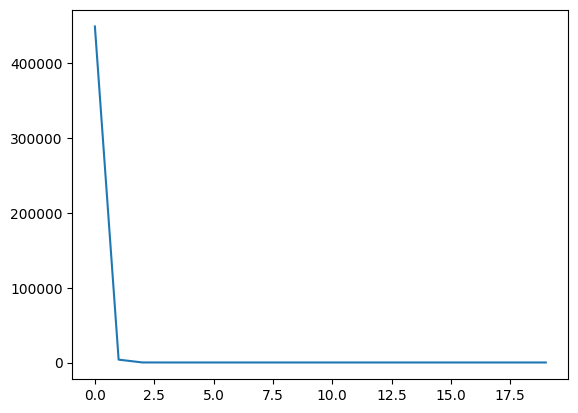

In [18]:
# lấy lr và params lúc nãy (trường hợp learning rate hợp lí)
a = torch.tensor([25.], requires_grad=True)
b = torch.tensor([3.], requires_grad=True)

a, b, losses = gradient_descent(20, 0.0001, (a, b), x_train, y_train)
plt.plot(losses)

In [ ]:

y_hat_test = model(x_test, a, b)
print('MSE, RMSE, MAE, MAPE:')
loss(y_hat_test, y_test)

MSE, RMSE, MAE, MAPE:


(289.6911579130751,
 17.020316034465257,
 11.646717071533203,
 0.011208592914044857)